# Zero to Hero

## 1.02  Carga del dataset desde la nube y operaciones básicas

Se muestra una alternativa a cargar el dataset directamente desde la nube, que funciona desde Kaggle, Google Colab
<br>
Si se está corriendo desde la PC local, siempre es preferible cargar el archivo del disco local.

In [1]:
library( "data.table")   #cargo la libreria  data.table

Warning message:
"package 'data.table' was built under R version 4.2.3"


"https://storage.googleapis.com/labo2023v/dataset_pequeno.csv" es el dataset de la Primera Competencia de la asignatura

In [2]:
dataset <- fread( "https://storage.googleapis.com/labo2023v/dataset_pequeno.csv")

Obviamente ahora el leer el archivo demora bastante, ya que se está bajando por internet, están viajando 160MB

### Ahora, algunas operaciones básicas con el dataset

cantidad de registros y columnas

In [3]:
nrow( dataset )
ncol( dataset )

[1] 329919

[1] 155

Otra forma de ver la cantidad de registros del dataset, al  *estilo data table*
<br>
El .N  es la cantidad de registros y va en la segunda poscion  dataset[ 1, 2, 3 ]

In [8]:
dataset[ , .N ]

[1] 329919

Ahora hacemos la apertura por el periodo, el campo  foto_mes

In [19]:
dataset[ , .N, foto_mes ]

foto_mes,N
<int>,<int>
202107,164682
202109,165237


nombre de las columnas del dataset

In [20]:
colnames( dataset )

[1] "numero_de_cliente"                   
  [2] "foto_mes"                            
  [3] "active_quarter"                      
  [4] "cliente_vip"                         
  [5] "internet"                            
  [6] "cliente_edad"                        
  [7] "cliente_antiguedad"                  
  [8] "mrentabilidad"                       
  [9] "mrentabilidad_annual"                
 [10] "mcomisiones"                         
 [11] "mactivos_margen"                     
 [12] "mpasivos_margen"                     
 [13] "cproductos"                          
 [14] "tcuentas"                            
 [15] "ccuenta_corriente"                   
 [16] "mcuenta_corriente_adicional"         
 [17] "mcuenta_corriente"                   
 [18] "ccaja_ahorro"                        
 [19] "mcaja_ahorro"                        
 [20] "mcaja_ahorro_adicional"              
 [21] "mcaja_ahorro_dolares"                
 [22] "cdescubierto_preacordado"            
 [23] "mcuentas_saldo"                      
 [24] "ctarjeta_debito"                     
 [25] "ctarjeta_debito_transacciones"       
 [26] "mautoservicio"                       
 [27] "ctarjeta_visa"                       
 [28] "ctarjeta_visa_transacciones"         
 [29] "mtarjeta_visa_consumo"               
 [30] "ctarjeta_master"                     
 [31] "ctarjeta_master_transacciones"       
 [32] "mtarjeta_master_consumo"             
 [33] "cprestamos_personales"               
 [34] "mprestamos_personales"               
 [35] "cprestamos_prendarios"               
 [36] "mprestamos_prendarios"               
 [37] "cprestamos_hipotecarios"             
 [38] "mprestamos_hipotecarios"             
 [39] "cplazo_fijo"                         
 [40] "mplazo_fijo_dolares"                 
 [41] "mplazo_fijo_pesos"                   
 [42] "cinversion1"                         
 [43] "minversion1_pesos"                   
 [44] "minversion1_dolares"                 
 [45] "cinversion2"                         
 [46] "minversion2"                         
 [47] "cseguro_vida"                        
 [48] "cseguro_auto"                        
 [49] "cseguro_vivienda"                    
 [50] "cseguro_accidentes_personales"       
 [51] "ccaja_seguridad"                     
 [52] "cpayroll_trx"                        
 [53] "mpayroll"                            
 [54] "mpayroll2"                           
 [55] "cpayroll2_trx"                       
 [56] "ccuenta_debitos_automaticos"         
 [57] "mcuenta_debitos_automaticos"         
 [58] "ctarjeta_visa_debitos_automaticos"   
 [59] "mttarjeta_visa_debitos_automaticos"  
 [60] "ctarjeta_master_debitos_automaticos" 
 [61] "mttarjeta_master_debitos_automaticos"
 [62] "cpagodeservicios"                    
 [63] "mpagodeservicios"                    
 [64] "cpagomiscuentas"                     
 [65] "mpagomiscuentas"                     
 [66] "ccajeros_propios_descuentos"         
 [67] "mcajeros_propios_descuentos"         
 [68] "ctarjeta_visa_descuentos"            
 [69] "mtarjeta_visa_descuentos"            
 [70] "ctarjeta_master_descuentos"          
 [71] "mtarjeta_master_descuentos"          
 [72] "ccomisiones_mantenimiento"           
 [73] "mcomisiones_mantenimiento"           
 [74] "ccomisiones_otras"                   
 [75] "mcomisiones_otras"                   
 [76] "cforex"                              
 [77] "cforex_buy"                          
 [78] "mforex_buy"                          
 [79] "cforex_sell"                         
 [80] "mforex_sell"                         
 [81] "ctransferencias_recibidas"           
 [82] "mtransferencias_recibidas"           
 [83] "ctransferencias_emitidas"            
 [84] "mtransferencias_emitidas"            
 [85] "cextraccion_autoservicio"            
 [86] "mextraccion_autoservicio"            
 [87] "ccheques_depositados"                
 [88] "mcheques_depositados"                
 [89] "ccheques_emitidos"                 

Exploración de clase_ternaria.

In [21]:
dataset[  , .N, list( foto_mes, clase_ternaria) ]

foto_mes,clase_ternaria,N
<int>,<chr>,<int>
202107,CONTINUA,162336
202107,BAJA+1,1078
202107,BAJA+2,1268
202109,,165237


###  varias formas de contar los BAJA+2

todas las formas dan el mismo resultado

In [22]:
nrow(  dataset[ clase_ternaria=="BAJA+2" ])

[1] 1268

In [23]:
dataset[ clase_ternaria=="BAJA+2", .N ] #el autentico estilo data.table

[1] 1268

In [24]:
dataset[  , sum(clase_ternaria=="BAJA+2")]

[1] 1268

### Conteo de proporcion de BAJA+2 en el dataset

In [25]:
dataset[ foto_mes==202107  ,  sum(clase_ternaria=="BAJA+2")/.N]

[1] 0.007699688

Conteo de la proporcion de BAJA+2 en un predicado

In [26]:
dataset[ foto_mes==202107 & ctrx_quarter < 20  ,  sum(clase_ternaria=="BAJA+2")/.N]

[1] 0.0583797

### Lift del predicado  ctrx_quarter  vs el universo

forma brutal de calcularlo

In [27]:
dataset[ foto_mes==202107 & ctrx_quarter < 20  ,  sum(clase_ternaria=="BAJA+2")/.N]  /dataset[ foto_mes==202107  ,  sum(clase_ternaria=="BAJA+2")/.N]

[1] 7.582087

### Ganancias del dataset

Agregado de la columna ganancia al dataset

Primero le asigno a TODOS los registros el valor de  -3000
<br>
la asignacion se hace con el  :=

In [28]:
dataset[ foto_mes==202107, ganancia := -3000]

y finalmente a los  BAJA+2 les asigno 117000

In [29]:
dataset[ foto_mes==202107 & clase_ternaria=="BAJA+2", ganancia := 117000]

Calculo la ganancia que tendria una campaña en donde envío estímulo a TODOS los clientes

In [30]:
dataset[ foto_mes==202107 , sum(ganancia)]

[1] -341886000

Si le enviara estímulo a todos, se **pierden**  341 millones de pesos

### Ganancias de predicados univariados

Calculo la ganancia de un predicado simple
ctrx_quarter < 20

In [31]:
dataset[ foto_mes==202107 & ctrx_quarter < 20,  sum( ganancia )  ]

[1] 42471000

Ahora  la ganancia de  *ctrx_quarter < 4 *

In [32]:
dataset[ foto_mes==202107 & ctrx_quarter < 4,  sum( ganancia )  ]

[1] 26598000

Ahora, en forma brutal e ineficiente, busco donde esta el mejor corte de  ctrx_quarter
<br>
Ya resolveremos esto en forma inteligente más adelante

In [33]:
for(  transacciones  in   0:50)
{
   cat(  transacciones, dataset[  foto_mes==202107 & ctrx_quarter < transacciones,  sum( ganancia )  ] , "\n")    
}

0 0 
1 16026000 
2 17991000 
3 20661000 
4 26598000 
5 29142000 
6 30750000 
7 32571000 
8 34017000 
9 35766000 
10 36756000 
11 37749000 
12 38055000 
13 39060000 
14 39513000 
15 40491000 
16 41883000 
17 42498000 
18 42786000 
19 42600000 
20 42471000 
21 42363000 
22 42651000 
23 41466000 
24 42804000 
25 42231000 
26 42159000 
27 42567000 
28 42165000 
29 41670000 
30 40596000 
31 40149000 
32 39861000 
33 38937000 
34 38175000 
35 37494000 
36 36402000 
37 35322000 
38 34158000 
39 33156000 
40 32073000 
41 31335000 
42 29820000 
43 28527000 
44 27519000 
45 26430000 
46 25062000 
47 23490000 
48 22065000 
49 20730000 
50 19152000 


#### Observo que el predicado  ctrx_quarter < 18 tiene la máxima ganancia

# Enhorabuena ! hemos alcanzado los 42.8 M de ganancia

### Ganancias de predicado complejo

In [34]:
dataset[  foto_mes==202107 & ctrx_quarter < 18 & mpasivos_margen < 29.8 ,  sum( ganancia )  ]

[1] 28866000

### gráficos de densidades

Visualización de la densidad de una variable versus clase_ternaria

In [35]:
library("ggplot2") #cargo la libreria ggplot2

Warning message:
"`aes_string()` was deprecated in ggplot2 3.0.0.
ℹ Please use tidy evaluation idioms with `aes()`.
ℹ See also `vignette("ggplot2-in-packages")` for more information."


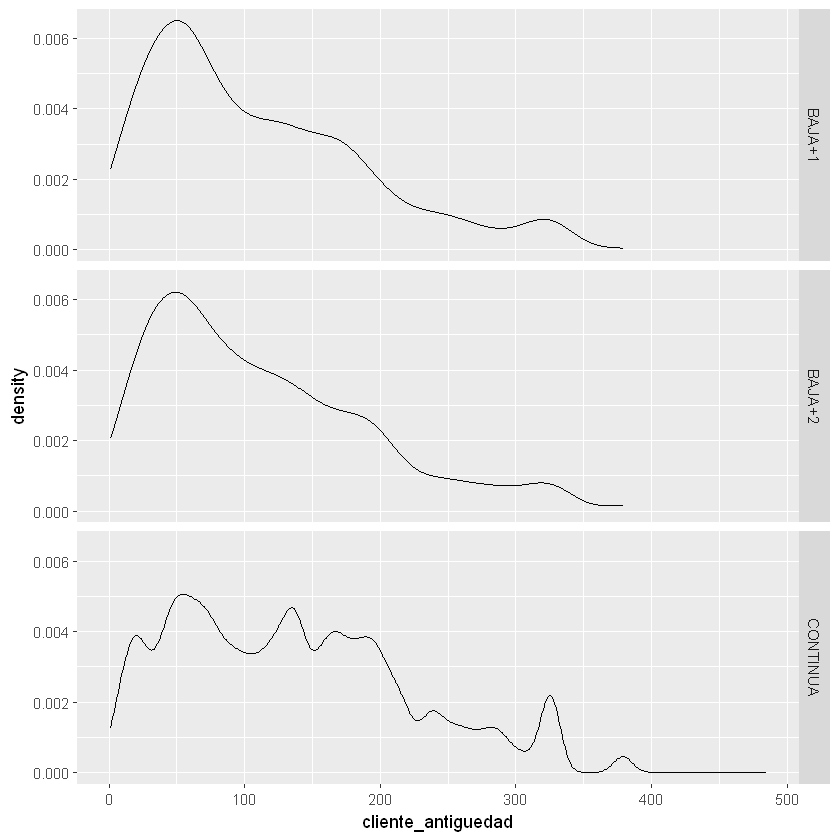

In [36]:
campo <- "cliente_antiguedad" 
ggplot(dataset[ foto_mes==202107] , aes_string(x = campo)) + geom_density(trim=TRUE, na.rm=TRUE) + facet_grid( "clase_ternaria~ .")

los gráficos salen muy pequeños, busco la documentacion https://blog.revolutionanalytics.com/2015/09/resizing-plots-in-the-r-kernel-for-jupyter-notebooks.html  y agrando los graficos

In [37]:
options(repr.plot.width=15, repr.plot.height=15)

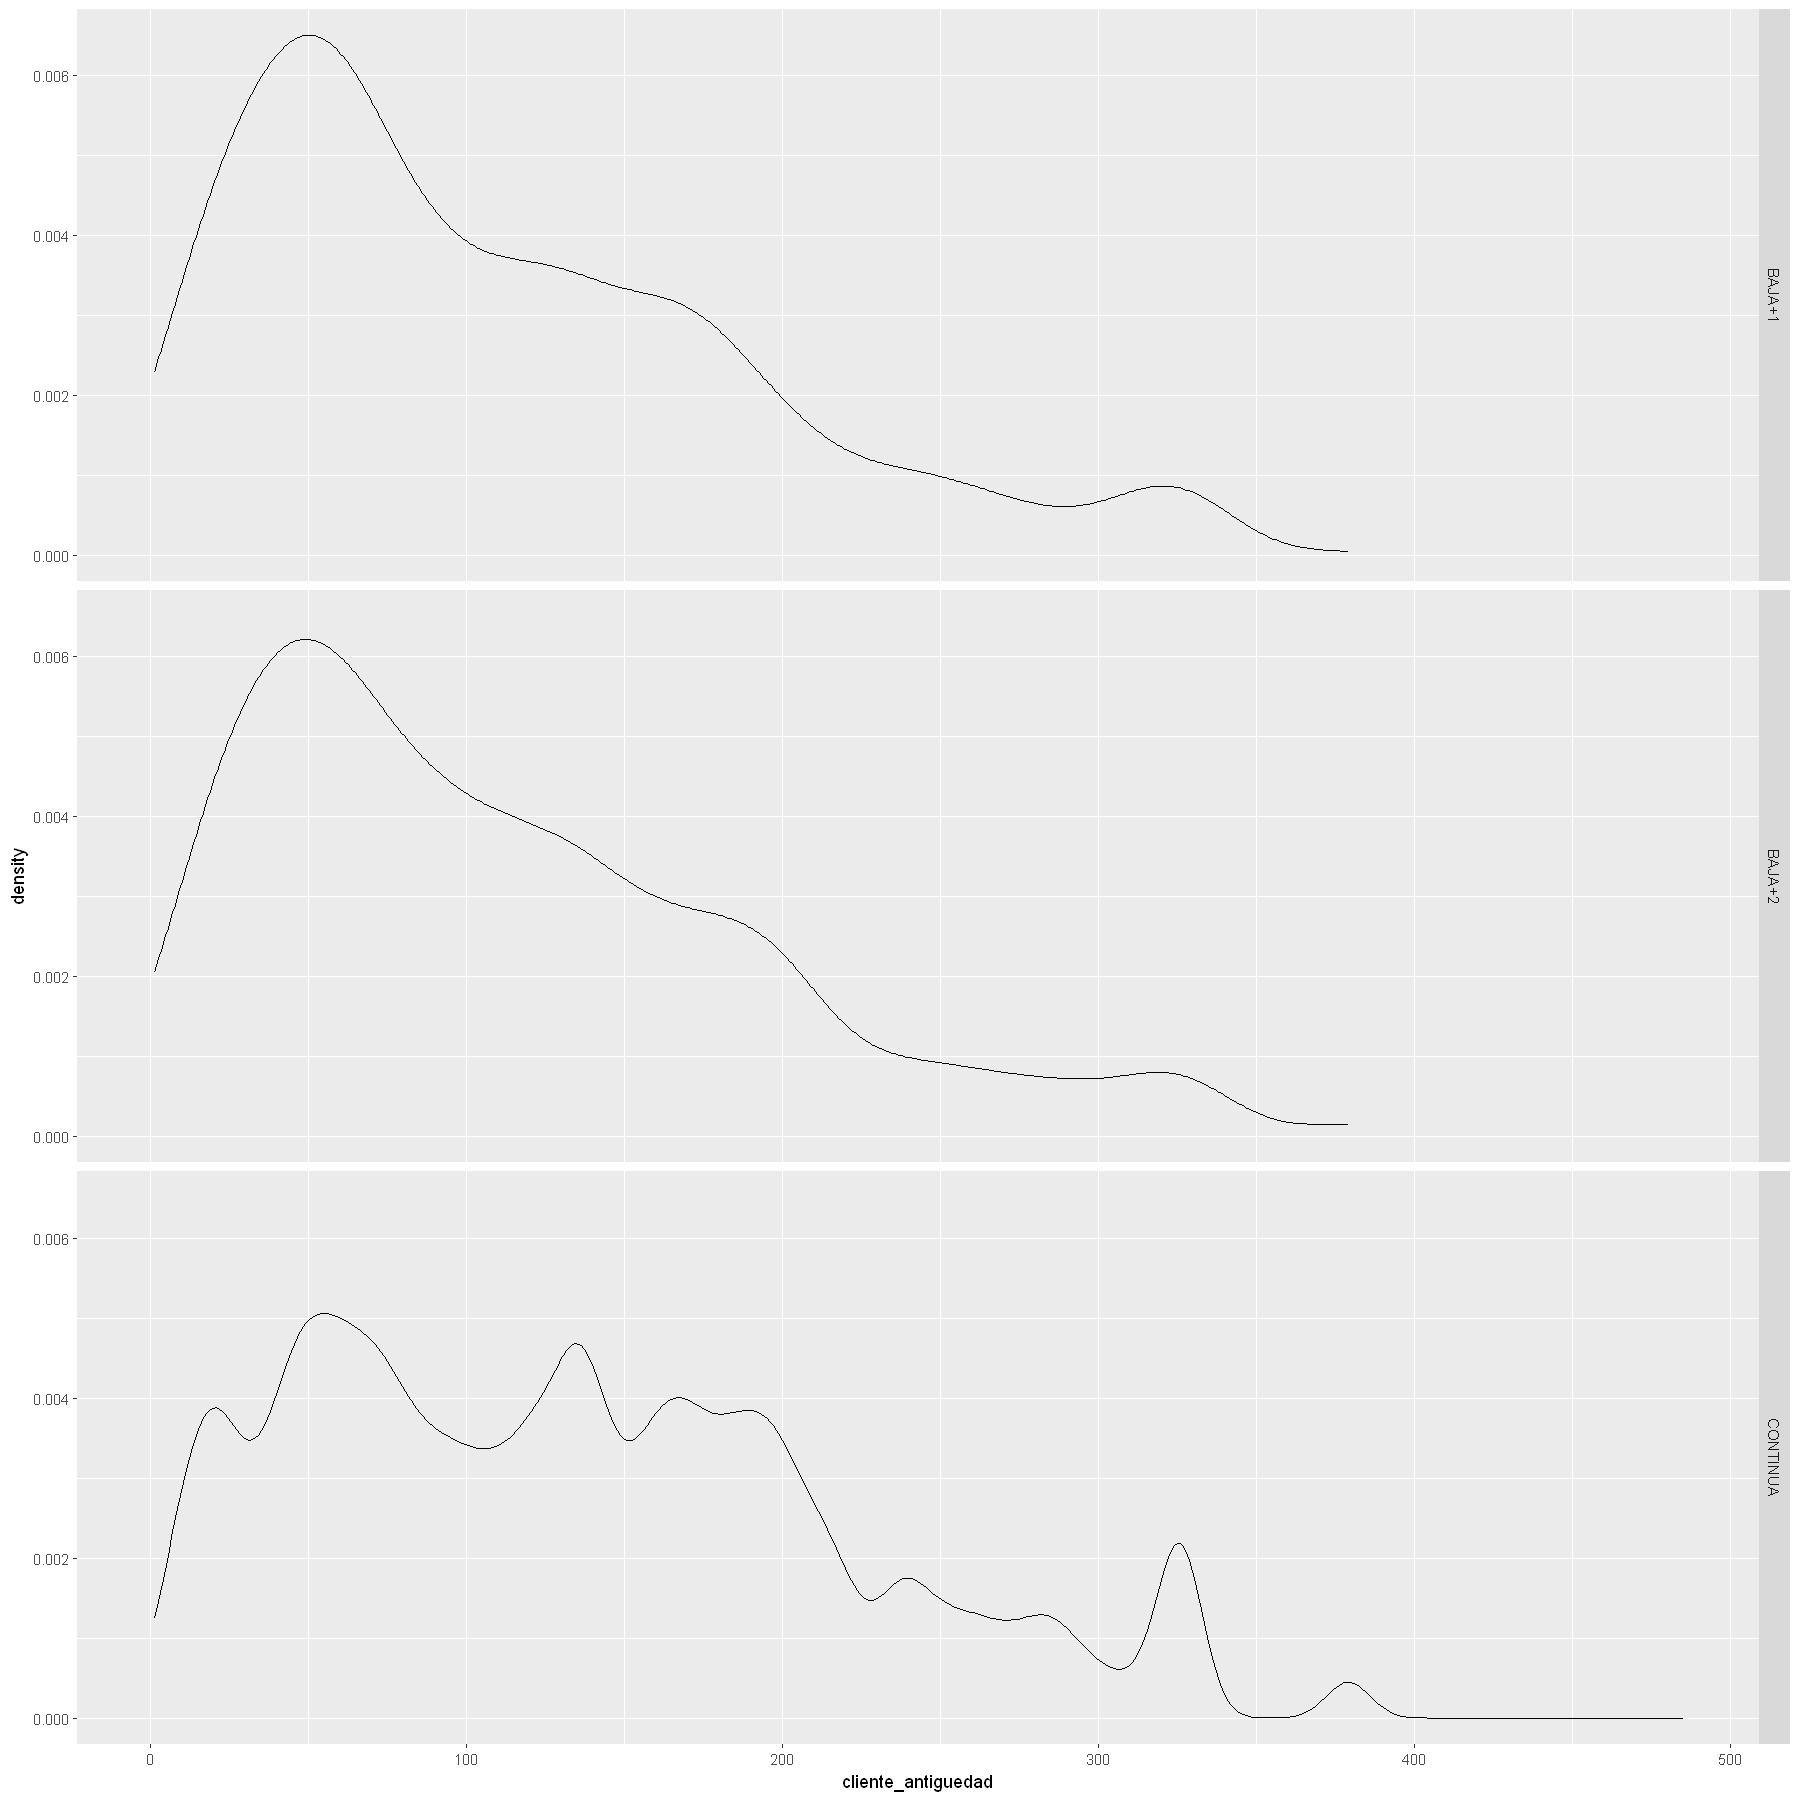

In [38]:
campo <- "cliente_antiguedad" 
ggplot(dataset[ foto_mes==202107], aes_string(x = campo)) + geom_density(trim=TRUE, na.rm=TRUE) + facet_grid( "clase_ternaria~ .")